## DATASET

In [4]:
from dataset_creation import getDataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train_blurred, x_train), (x_test_blurred, x_test)  = getDataset()

170508288/170498071 [==============================] - 2s 0us/step


Resolution $32*32$

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# The dataset is already normalized
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

Let's see some examples.

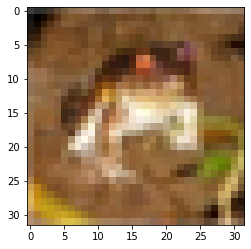

In [5]:
plt.imshow(x_train[0])

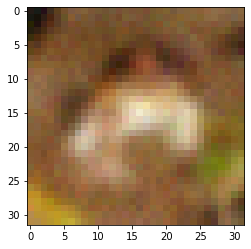

In [6]:
plt.imshow(x_train_blurred[0])

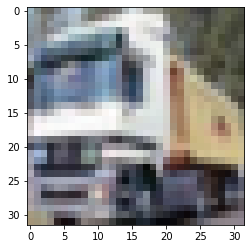

In [7]:
plt.imshow(x_train[1])

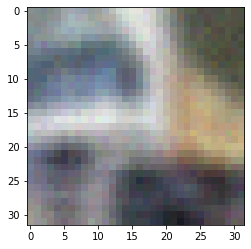

In [8]:
plt.imshow(x_train_blurred[1])

## MODEL

In [13]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras import Model

In [11]:
encoding_dim = 32

In [41]:
xin = Input(shape=(32,32,3))

# 32*32*3 =3072
x = Flatten()(xin)

x = Dense(units=512)(x)

# x = Dense(units=256)(x)

x = Dense(units=128)(x)

# x = Dense(units=64)(x)

x = Dense(units=encoding_dim)(x)

x = Dense(units=128)(x)

x = Dense(units=512)(x)

x = Dense(units=3072, activation='sigmoid')(x)

y = Reshape(target_shape=(32,32,3))(x)

model = Model(inputs=xin, outputs=y)

In [36]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               1573376   
                                                                 
 dense_19 (Dense)            (None, 128)               65664     
                                                                 
 dense_20 (Dense)            (None, 32)                4128      
                                                                 
 dense_21 (Dense)            (None, 128)               4224      
                                                                 
 dense_22 (Dense)            (None, 512)               6604

## TRAINING

In [37]:
from tensorflow.keras.optimizers import Adam

In [42]:
model.compile(optimizer=Adam(), loss='mse')

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback_checkpoint = ModelCheckpoint('DenseAutoencoder1.{epoch:02d}-{val_loss:.4f}.hdf5', save_weights_only=True) 

In [44]:
hist = model.fit(x_train_blurred, x_train, epochs=15, validation_split=0.2, callbacks=[callback_checkpoint])

Epoch 1/15
1250/1250 [==============================] - 102s 53ms/step - loss: 0.0212 - val_loss: 0.0138
Epoch 2/15
1250/1250 [==============================] - 64s 52ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 3/15
1250/1250 [==============================] - 63s 51ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 4/15
1250/1250 [==============================] - 64s 51ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 5/15
1250/1250 [==============================] - 64s 52ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 6/15
1250/1250 [==============================] - 63s 50ms/step - loss: 0.0133 - val_loss: 0.0131
Epoch 7/15
1250/1250 [==============================] - 62s 50ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 8/15
1250/1250 [==============================] - 64s 51ms/step - loss: 0.0131 - val_loss: 0.0129
Epoch 9/15
1250/1250 [==============================] - 63s 51ms/step - loss: 0.0170 - val_loss: 0.0130
Epoch 10/15
1250/1250 [==============================] - 63s 51

In [45]:
def plot_history(training_history, n_epochs=None):
    if not n_epochs:
      n_epochs = len(training_history.history['loss'])

    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

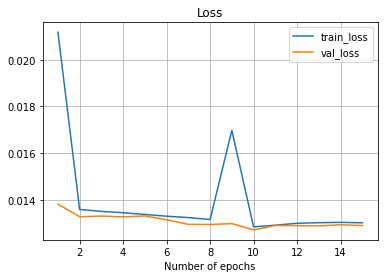

In [46]:
plot_history(hist)

Final score on the test set

In [47]:
from tensorflow.keras.losses import MeanSquaredError
mse = MeanSquaredError()
mse(x_test, model.predict(x_test_blurred)).numpy()

0.012976035